<a href="https://colab.research.google.com/github/dajley/Analyzing-Outliers/blob/main/Main_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!pip install scikit-learn *

In [3]:
# import data

df_main = pd.read_csv('/content/drive/MyDrive/Datasets/df_main.csv')

In [4]:
# shows general info
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Value               286 non-null    float64
 1   Avg Max Temp        286 non-null    float64
 2   Avg Min Temp        286 non-null    float64
 3   Avg Temp            286 non-null    float64
 4   Avg Bare Soil Temp  286 non-null    float64
 5   Avg Turf Soil Temp  286 non-null    float64
 6   Avg Wind Speed      286 non-null    float64
 7   Avg Max Wind Speed  286 non-null    float64
 8   Total Solar Rad     286 non-null    float64
 9   Avg Penman PET      286 non-null    float64
 10  Total Penman PET    286 non-null    float64
 11  Total Rainfall      286 non-null    float64
 12  Avg Dew Point       286 non-null    float64
 13  Avg Wind Chill      286 non-null    float64
dtypes: float64(14)
memory usage: 31.4 KB


# Descriptive Statistics and Data Distribution

In [5]:
#shows some descriptive statistics
df_main.describe()

,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,94.711538,59.099552,35.918376,47.506944,49.042607,46.393213,9.866484,25.079365,448.886152,0.198280,6.067767,1.883360,34.407533,43.819885
std,35.748752,3.773902,2.773045,3.045846,3.455934,4.063401,1.259208,2.396947,32.467450,0.027049,0.827335,1.055247,3.096325,3.926210
min,25.400000,49.942500,29.261500,40.661500,39.873500,36.401000,7.519000,18.379000,362.750000,0.138500,4.244000,0.192500,26.804500,34.539500
25%,66.300000,56.588000,33.665750,45.205000,46.461250,43.298375,9.031375,23.834875,427.737875,0.180500,5.535125,0.970000,32.714625,40.730250
50%,92.450000,59.881250,35.962750,47.671000,49.115000,46.565250,9.871500,25.149250,446.897000,0.202250,6.168250,1.707250,34.651500,44.318750
75%,120.625000,61.739375,37.861125,49.736500,51.818000,49.457000,10.669875,26.591375,475.160500,0.218500,6.685500,2.514125,36.387750,46.477000
max,198.000000,67.994000,42.368500,54.553000,57.404000,55.556000,14.441500,36.001000,536.538000,0.248500,7.669000,6.194500,42.040500,52.869500


In [6]:
#Calculates the skewness
skew = df_main.skew()
print(skew)

Value                 0.318464
Avg Max Temp         -0.258031
Avg Min Temp          0.098246
Avg Temp              0.049892
Avg Bare Soil Temp   -0.137111
Avg Turf Soil Temp   -0.126948
Avg Wind Speed        0.550337
Avg Max Wind Speed    0.434659
Total Solar Rad       0.046374
Avg Penman PET       -0.337436
Total Penman PET     -0.321591
Total Rainfall        0.915102
Avg Dew Point        -0.198629
Avg Wind Chill       -0.087083
dtype: float64


In [7]:
#calculates the kurtosis
kurtosis = df_main.kurtosis()
print(kurtosis)

Value                -0.309842
Avg Max Temp         -0.405412
Avg Min Temp         -0.623781
Avg Temp             -0.698781
Avg Bare Soil Temp   -0.590043
Avg Turf Soil Temp   -0.544708
Avg Wind Speed        0.817949
Avg Max Wind Speed    2.767803
Total Solar Rad      -0.372088
Avg Penman PET       -0.721769
Total Penman PET     -0.701188
Total Rainfall        0.859633
Avg Dew Point        -0.223580
Avg Wind Chill       -0.532499
dtype: float64


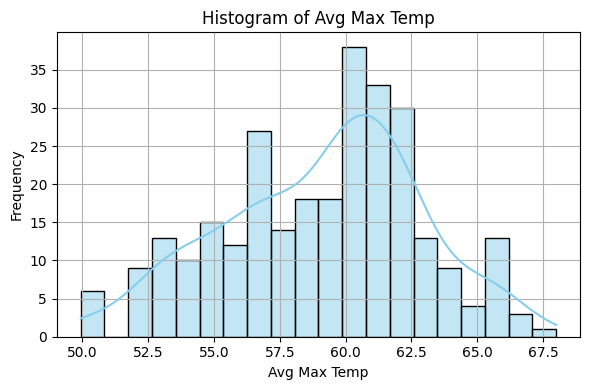

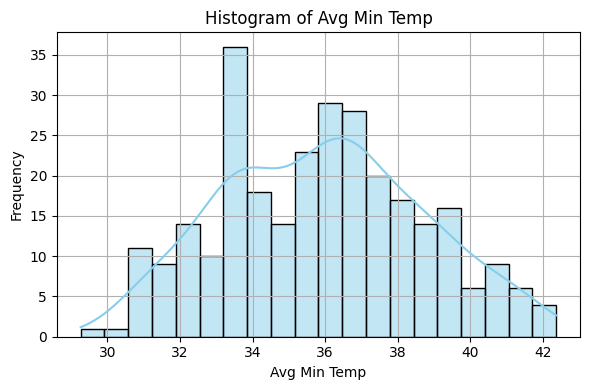

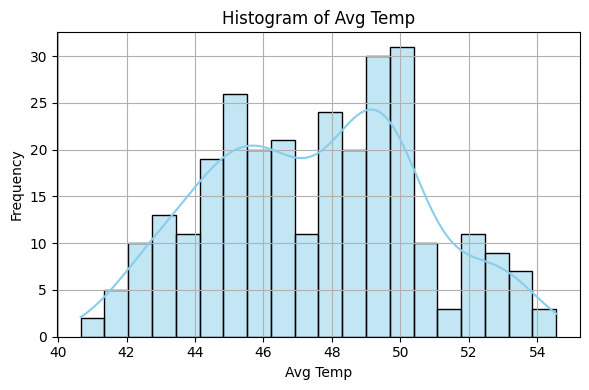

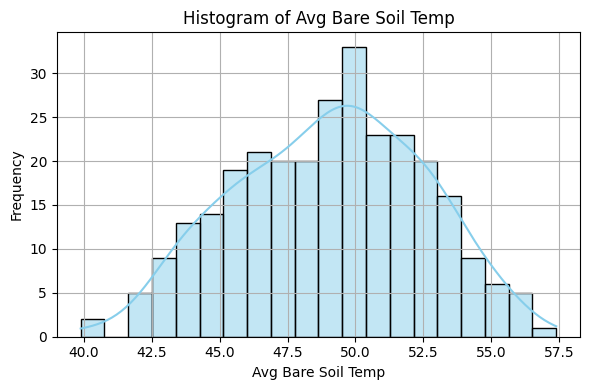

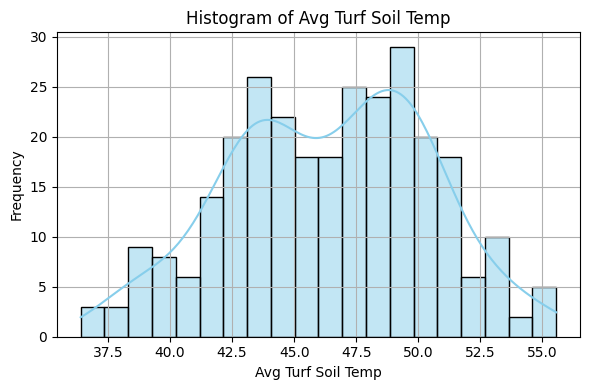

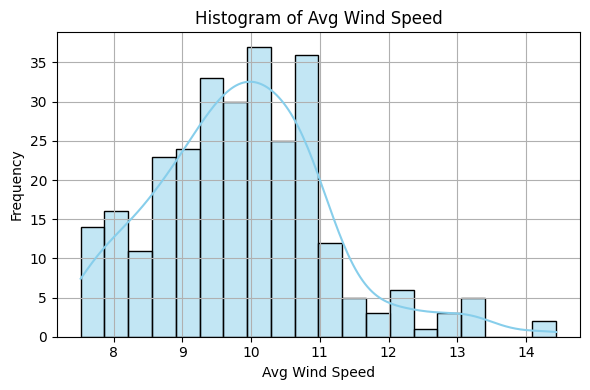

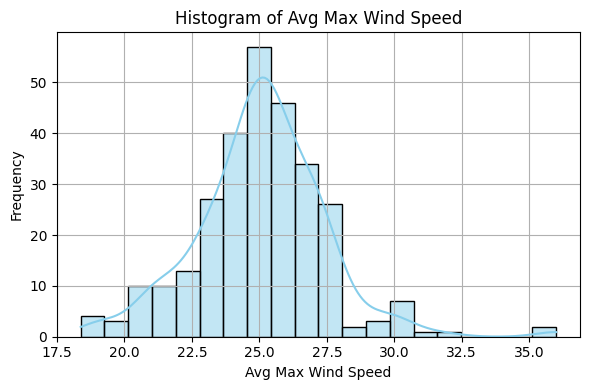

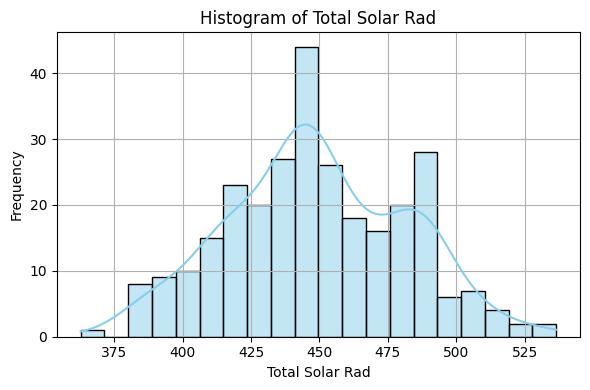

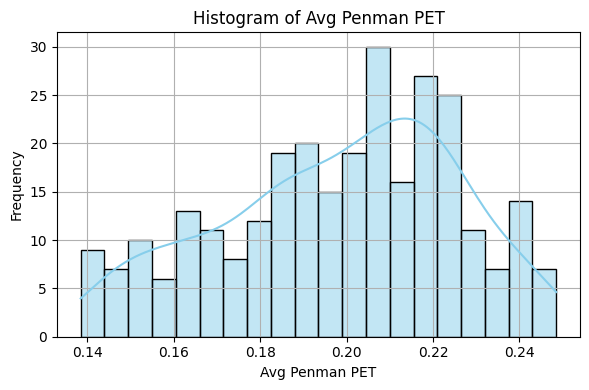

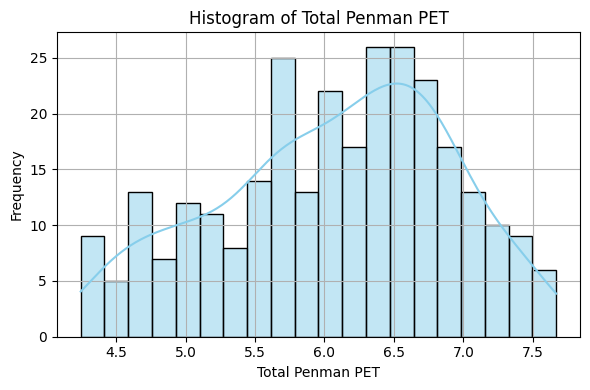

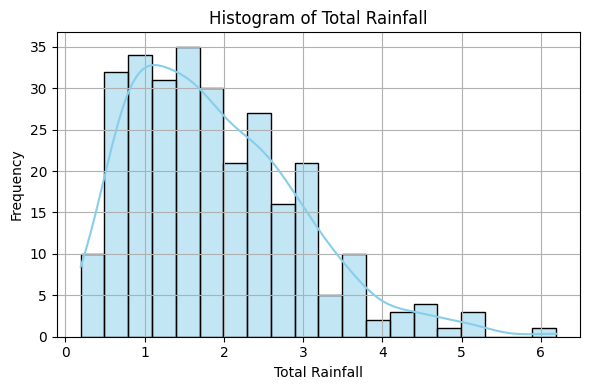

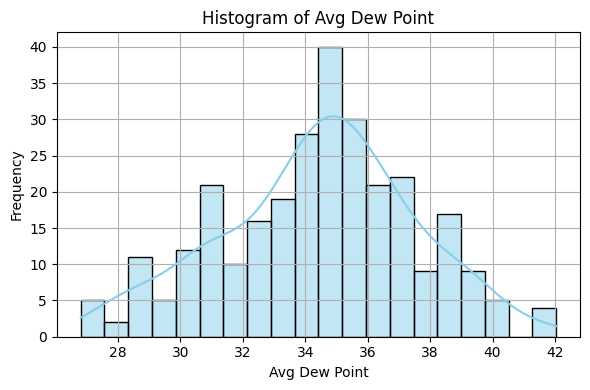

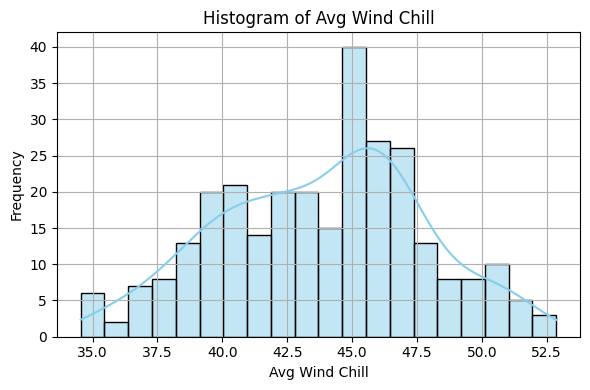

In [8]:
#Shows histogram for each feature compared to the target 'Value'
#Loop is used to go through each feature one by one
features = df_main.columns[1:14]

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_main[feature], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

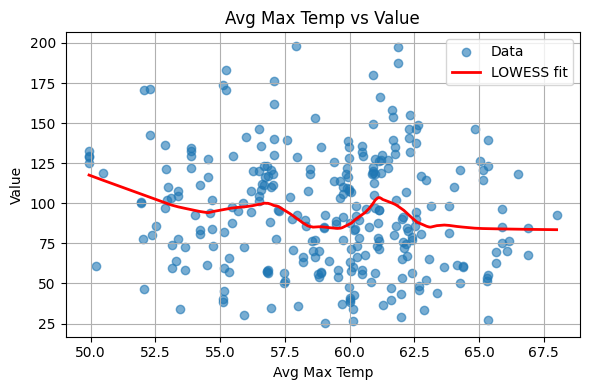

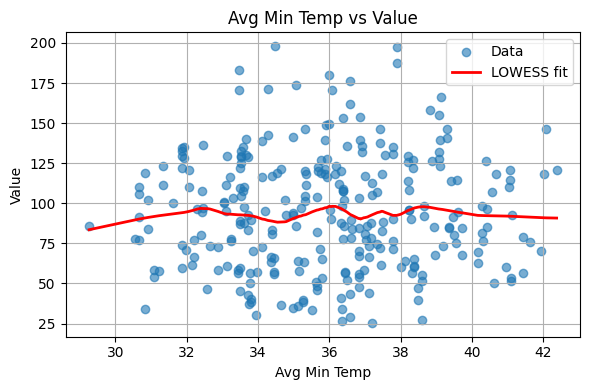

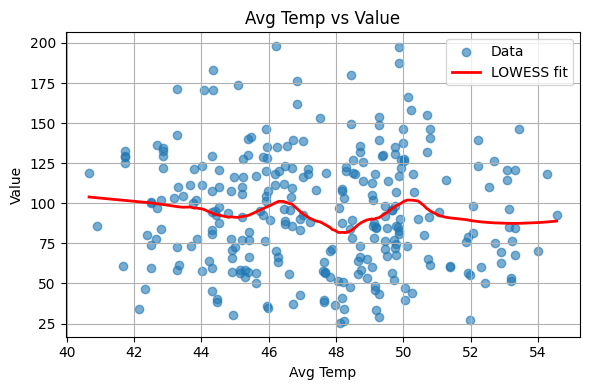

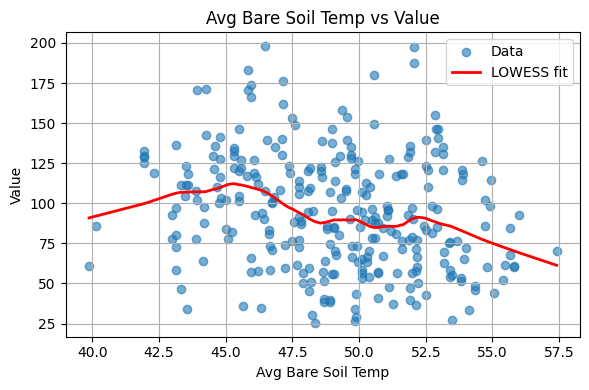

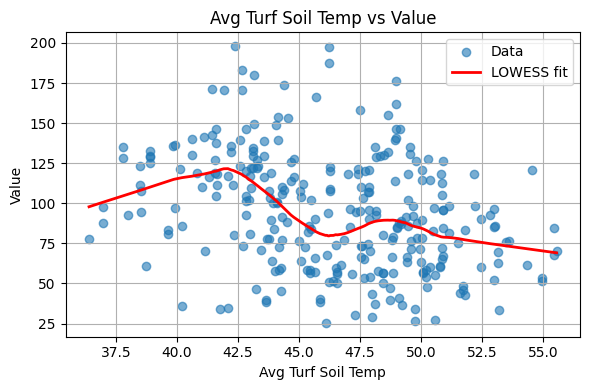

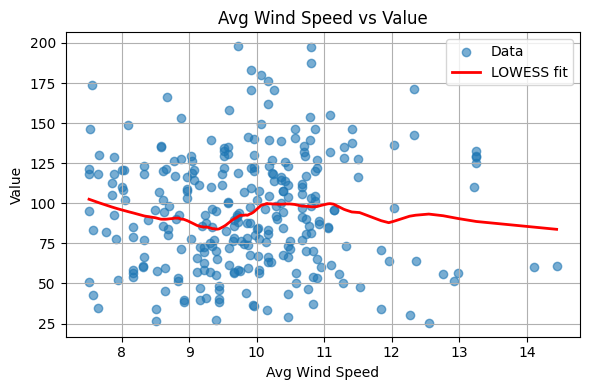

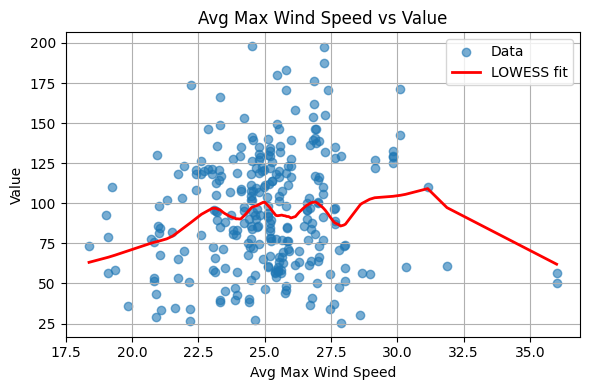

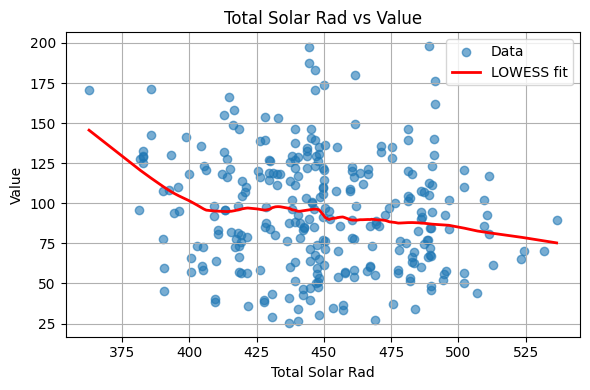

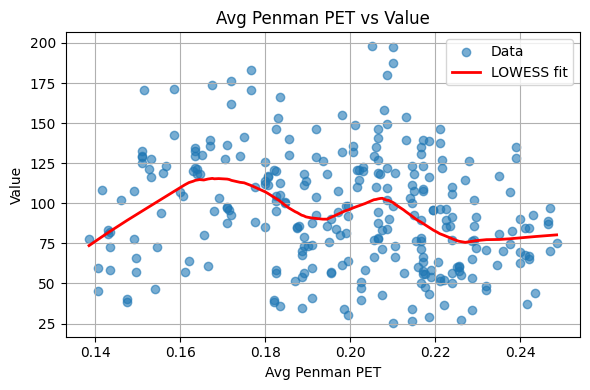

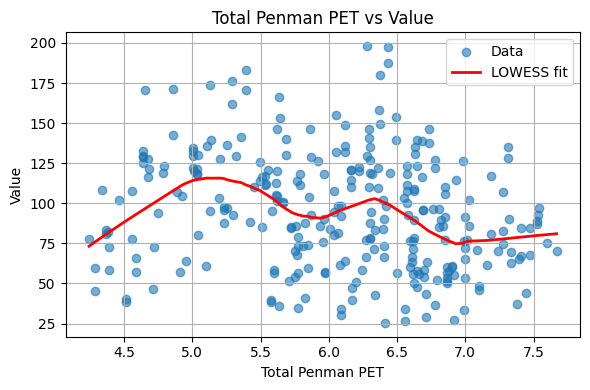

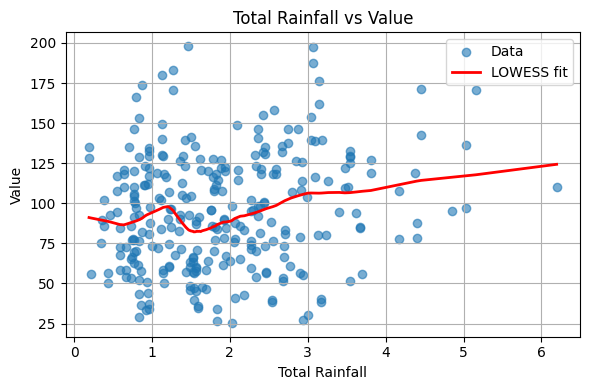

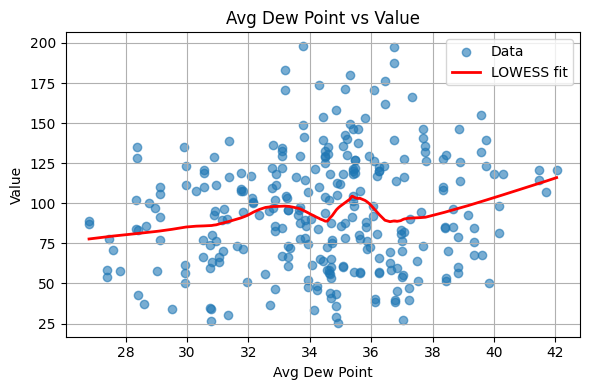

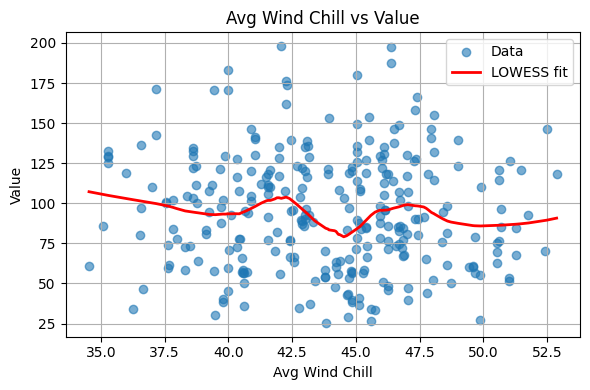

In [9]:
import statsmodels.api as sm

target_col = 'Value'
features = [col for col in df_main.columns if col != target_col]

for feature in features:
    x = df_main[feature]
    y = df_main[target_col]

    # Apply LOWESS smoothing
    lowess = sm.nonparametric.lowess
    smoothed = lowess(y, x, frac=0.3)  # frac controls the smoothness

    # Plot
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, label='Data', alpha=0.6)
    plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', label='LOWESS fit', linewidth=2)
    plt.xlabel(feature)
    plt.ylabel(target_col)
    plt.title(f'{feature} vs {target_col}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


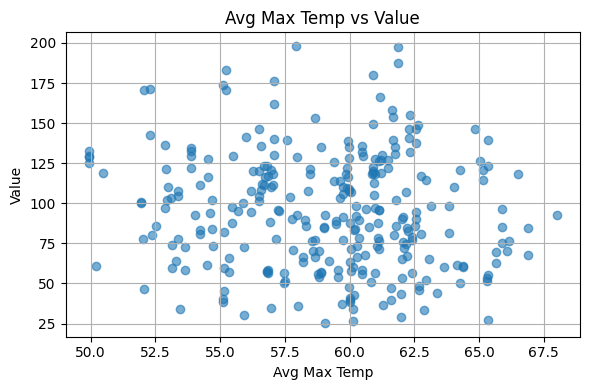

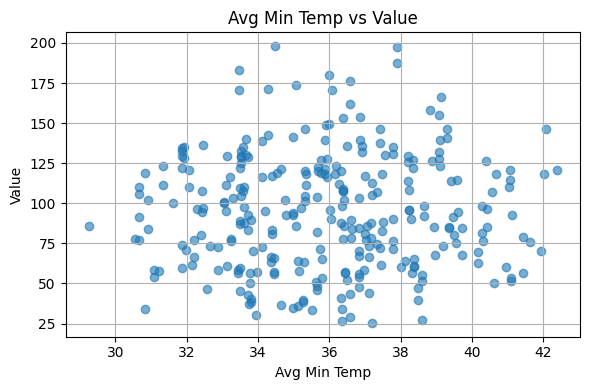

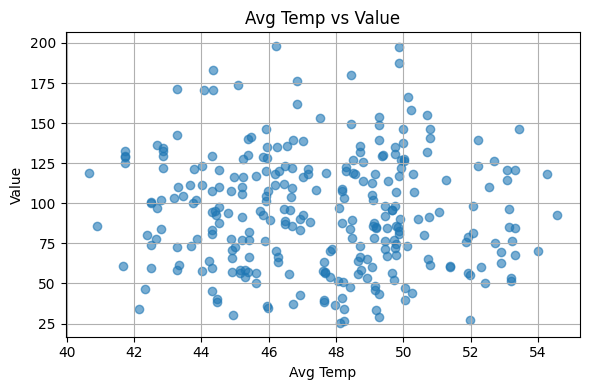

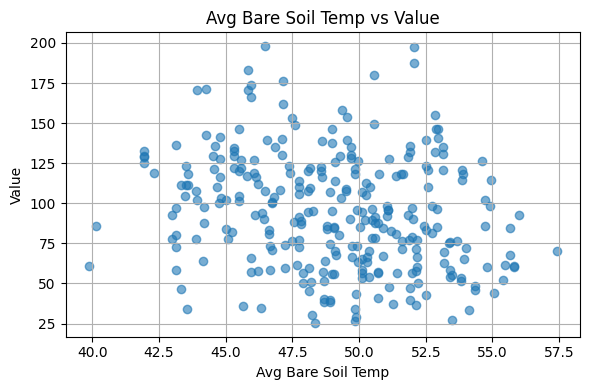

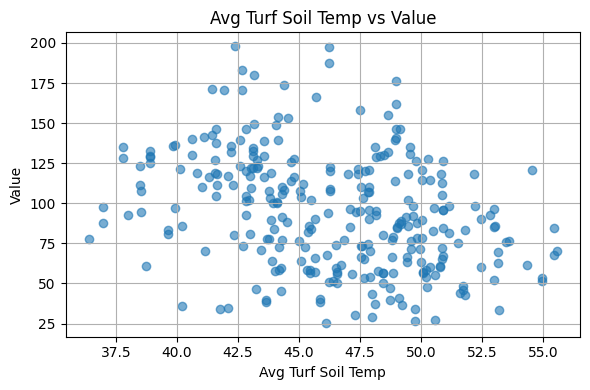

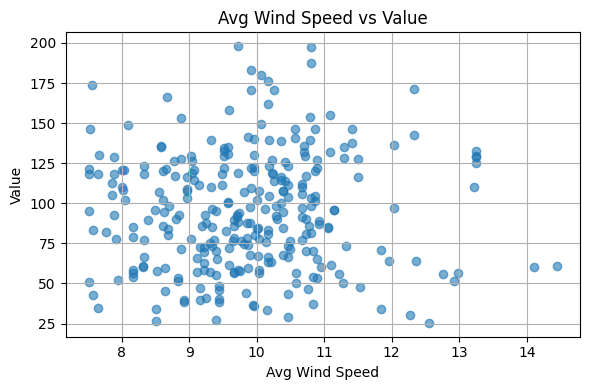

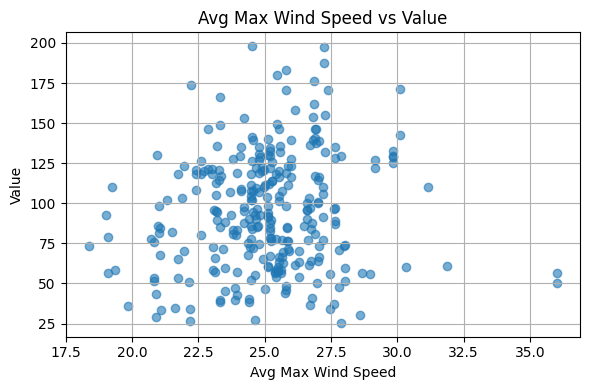

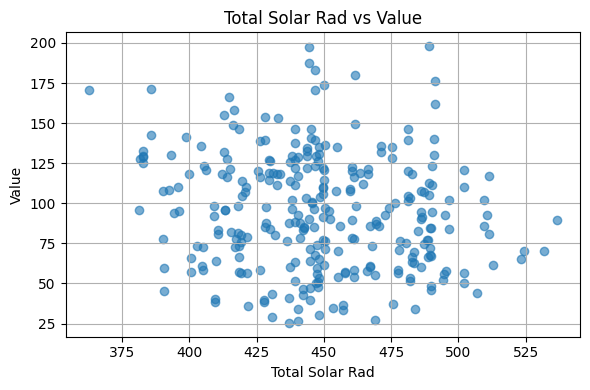

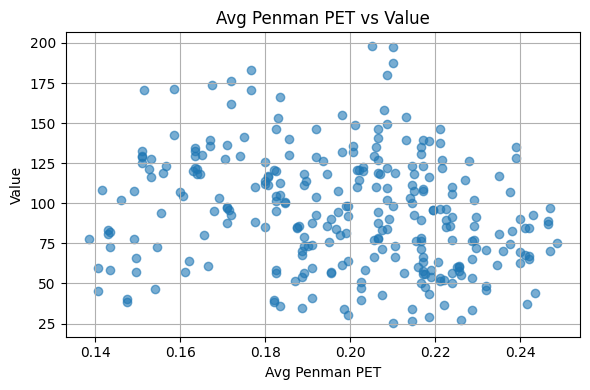

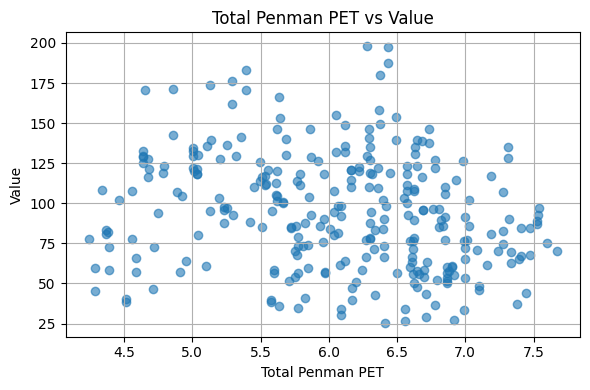

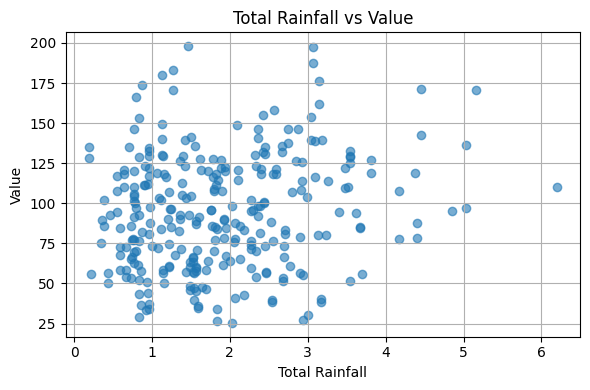

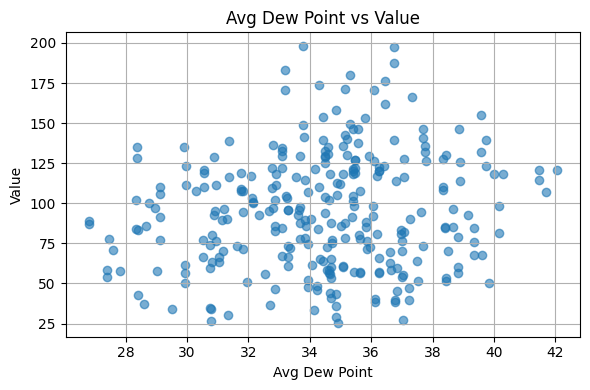

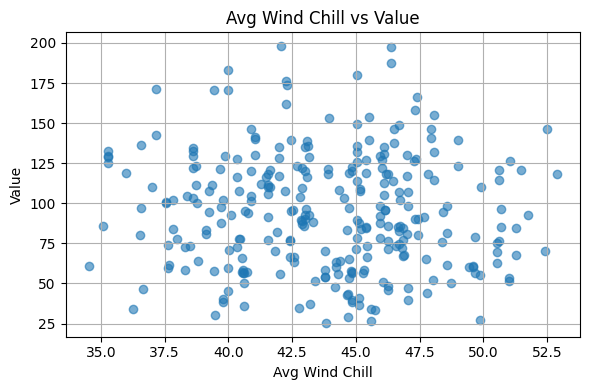

In [10]:
target_col = 'Value'  # Change this to the actual name of your target column

# Plot each feature against the target
for col in df_main.columns:
    if col != target_col:
        plt.figure(figsize=(6, 4))
        plt.scatter(df_main[col], df_main[target_col], alpha=0.6)
        plt.title(f"{col} vs {target_col}")
        plt.xlabel(col)
        plt.ylabel(target_col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()


#

In [11]:
'''
#Polynomia Regression Model

from sklearn.linear_model import PolynomialRegression

model = PolynomialRegression(degree=2)

model.fit(X, y)
y_pred = model.predict(X_new)
'''

'\n#Polynomia Regression Model \n\nfrom sklearn.linear_model import PolynomialRegression\n\nmodel = PolynomialRegression(degree=2)\n\nmodel.fit(X, y)\ny_pred = model.predict(X_new)\n'

In [12]:
#Creates a polynomial model w NumPy method
#polymodel = np.poly1d(np.polyfit(df_main['Avg Wind Speed'], df_main['Value'], 2))

In [13]:
#Shows how line will display from first position to last position
#polyline = np.linspace(df_main['Avg Wind Speed'].min(), df_main['Avg Wind Speed'].max(), 100)

In [14]:
#show original scatter plot
#plt.scatter(df_main['Avg Wind Speed'], df_main['Value'], color='blue', label='Original Data')

In [15]:
#draw line of polynomial regression
'''
plt.plot(polyline, polymodel(polyline), color='red', label='Polynomial Fit')
plt.xlabel('Avg Wind Speed')
plt.ylabel('Value')
plt.title('Polynomial Regression Model')
plt.legend()
plt.grid(True)
plt.show()
'''

"\nplt.plot(polyline, polymodel(polyline), color='red', label='Polynomial Fit')\nplt.xlabel('Avg Wind Speed')\nplt.ylabel('Value')\nplt.title('Polynomial Regression Model')\nplt.legend()\nplt.grid(True)\nplt.show()\n"

In [16]:
'''
#Creates a polynomial model w NumPy method
polymodel = np.poly1d(np.polyfit(df_main['Avg Wind Speed'], df_main['Value'], 2))

#Shows how line will display from first position to last position
polyline = np.linspace(df_main['Avg Wind Speed'].min(), df_main['Avg Wind Speed'].max(), 100)

#show original scatter plot
plt.scatter(df_main['Avg Wind Speed'], df_main['Value'], color='blue', label='Original Data')

#draw line of polynomial regression
plt.plot(polyline, polymodel(polyline), color='red', label='Polynomial Fit')
plt.xlabel('Avg Wind Speed')
plt.ylabel('Value')
plt.title('Polynomial Regression Model')
plt.legend()
plt.grid(True)
plt.show()
'''


"\n#Creates a polynomial model w NumPy method\npolymodel = np.poly1d(np.polyfit(df_main['Avg Wind Speed'], df_main['Value'], 2))\n\n#Shows how line will display from first position to last position\npolyline = np.linspace(df_main['Avg Wind Speed'].min(), df_main['Avg Wind Speed'].max(), 100) \n\n#show original scatter plot\nplt.scatter(df_main['Avg Wind Speed'], df_main['Value'], color='blue', label='Original Data')\n\n#draw line of polynomial regression\nplt.plot(polyline, polymodel(polyline), color='red', label='Polynomial Fit')\nplt.xlabel('Avg Wind Speed')\nplt.ylabel('Value')\nplt.title('Polynomial Regression Model')\nplt.legend()\nplt.grid(True)\nplt.show()\n"

#Data Preperation

##Data Seperation as x and y

In [17]:
#Define the target "Value" as y
y = df_main['Value']
y

,Value
0,104.9
1,59.7
2,43.0
3,76.8
4,94.9
...,...
281,117.1
282,39.7
283,65.1
284,98.6


In [18]:
#Define the features without the target "Value" as x
x = df_main.drop('Value', axis=1) #axis = 1 does column, axis = 0 does row
x

,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
0,60.9285,37.1985,49.0635,50.2490,50.8615,7.8580,23.1800,489.1580,0.1835,5.6170,1.3810,34.8855,46.0855
1,53.1395,31.8545,42.4970,47.2270,46.5050,9.8660,28.0395,447.4045,0.1910,5.8490,2.2715,30.7485,37.6335
2,60.1670,33.7200,46.9435,52.5145,51.8025,7.5750,23.9520,442.3180,0.2075,6.3380,2.1860,28.4045,44.6370
3,58.6490,32.1940,45.4220,52.1705,48.8195,8.3395,25.6365,488.8215,0.2055,6.2715,0.7400,30.5045,42.3990
4,57.2660,34.1885,45.7275,49.0000,47.4995,7.5190,23.1775,396.1995,0.1680,5.1335,2.2735,32.6630,42.4450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,62.7390,36.9900,49.8645,51.3840,42.9890,10.7280,26.8820,511.3620,0.2350,7.1915,0.9650,36.1970,47.0220
282,60.0255,35.2670,47.6465,48.9125,43.6705,8.9215,23.2990,427.6245,0.1820,5.5765,2.5450,36.7735,44.8625
283,62.0395,35.7990,48.9195,50.1140,47.6505,10.8985,21.7265,448.2195,0.2285,6.9955,0.7300,34.6885,44.7150
284,63.8520,40.2650,52.0590,52.7185,51.1560,10.7980,21.0045,418.0985,0.1990,6.0710,2.3815,40.1690,48.5900


##Split Data

In [19]:
#imports from package
from sklearn.model_selection import train_test_split

#creates 4 variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
#shows 80% of data
x_train

,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
139,58.1885,34.3745,46.2820,50.2890,49.4465,10.1725,25.5455,482.9155,0.2170,6.6100,1.5275,31.0480,42.5615
25,64.1465,37.4505,50.7985,55.4535,54.3255,9.5945,26.1580,449.9430,0.2345,7.1585,1.9170,34.0605,48.5750
82,56.6120,36.2730,46.4430,46.2225,45.1465,10.6710,25.1600,464.4590,0.1800,5.5415,0.9500,34.9825,41.2925
144,59.0220,39.3410,49.1815,49.0625,49.0225,11.0530,25.8375,442.5125,0.1875,5.7260,3.6680,38.3950,45.3900
66,60.8520,37.4760,49.1640,51.6620,50.8285,10.2400,25.4400,399.7950,0.2070,6.3180,2.5950,34.6720,46.2750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,55.1325,35.0595,45.0960,45.9585,44.3845,7.5575,22.2085,450.0720,0.1675,5.1315,0.8770,34.2910,42.2965
71,55.8675,31.6130,43.7405,44.7285,43.9295,10.3550,26.5920,476.5695,0.2145,6.5735,0.7845,28.7730,38.7750
106,58.3820,33.5795,45.9810,46.4845,45.0275,10.3880,25.6520,454.6380,0.2150,6.5705,1.8960,30.2990,42.2180
270,62.5815,37.4175,50.0000,48.9735,41.5925,11.4090,26.9345,439.4525,0.2210,6.7335,2.7450,35.5725,46.4770


In [21]:
#shape of x_train
x_train.shape

(228, 13)

In [22]:
#shows 20% of data
x_test

,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
9,60.3065,37.1160,48.7115,49.7380,47.5380,10.4655,27.0440,418.6625,0.2105,6.4035,2.6950,33.2895,45.4505
267,59.9805,31.9250,45.9530,49.6965,37.8085,11.2915,27.6480,475.4230,0.2390,7.3115,0.1925,28.3810,41.9850
143,60.3650,36.6020,48.4840,50.4850,50.0335,9.6585,25.2500,460.6345,0.2165,6.6245,1.9300,33.8475,45.0510
212,55.1450,35.6535,45.3995,45.2325,45.3710,7.7665,21.5215,415.6500,0.1435,4.3860,0.8740,37.0760,41.9055
227,62.3305,39.0605,50.6955,52.8510,48.6460,11.0810,27.2805,413.0720,0.1980,6.0510,2.4230,39.5625,48.0465
155,51.9535,33.0505,42.5020,46.7240,44.0985,9.5825,27.0005,445.6035,0.1845,5.6630,2.4415,32.1465,37.5475
283,62.0395,35.7990,48.9195,50.1140,47.6505,10.8985,21.7265,448.2195,0.2285,6.9955,0.7300,34.6885,44.7150
73,60.5050,38.2095,49.3575,49.2780,48.3295,10.7115,27.8585,438.2450,0.2055,6.2820,1.4000,35.9260,45.9310
196,56.5800,38.2415,47.4110,47.0260,44.3895,8.0275,22.4170,392.3105,0.1415,4.3390,2.9150,38.3440,44.3310
33,61.5900,38.4945,50.0425,51.9075,48.7160,9.1675,23.8705,444.9710,0.2025,6.1715,1.5430,37.2150,47.0620


In [23]:
#shape of x_test
x_test.shape

(58, 13)

#Model Building

##Polynomial Regression

###Training the model

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

#Polynomial Regression function
# We'll use a pipeline to combine polynomial features and linear regression
prmodel = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

#Train the empty model on following dataset
prmodel.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

###Applying the model to make a preidction

In [27]:
#make prediction on original dataset it is training on
y_pr_train_pred = prmodel.predict(x_train)

#make preiction on original dataset it is testing on
y_pr_test_pred = prmodel.predict(x_test)

In [28]:
y_pr_train_pred

array([ 50.43255686,  48.06266774,  81.24928597,  96.74742465,
       100.04969747,  55.5743551 ,  60.39312129,  63.9451051 ,
       135.15963034,  41.77589803, 109.8238807 ,  91.62546572,
       108.55106773,  60.67199308,  41.50396335, 115.31073223,
       111.74528083,  70.8304165 , 106.17261422,  81.6053926 ,
       154.12450651,  97.46522828, 150.73365831,  88.20682845,
        74.43139325,  26.12972766, 154.12450651,  75.23938769,
        60.85274118,  62.98894468,  54.7242421 , 129.64232867,
        95.74049048, 171.16830939,  75.99789957,  91.22178976,
        55.92024888, 136.91230386, 109.66141822, 129.57475305,
        89.80470281,  67.46413674,  90.42889851, 112.1327343 ,
        71.06687071, 121.67897809, 107.0149034 , 167.65751551,
        95.52483236,  77.86656423, 116.63580938, 167.65751551,
       105.99898228, 145.64782572, 102.51338761,  83.91037506,
        60.39312129, 129.78676382,  73.25943679,  85.6762541 ,
        67.46413674, 116.63580938,  88.94067787,  88.24

In [29]:
y_pr_test_pred

array([  90.42889851,  138.30619809,   95.63170711,  157.3172451 ,
        140.63068449,  103.4606077 ,   70.02162158,  143.36939051,
        172.96781727,  109.8238807 ,   96.88506992,  103.4606077 ,
       -110.39041403,  101.44052637,  112.68700378,  159.11020658,
        258.00255224,  186.10272186,  136.91230386,  145.64782572,
         50.43255686,  120.67570634,  135.02389546,  173.79091672,
        122.33048961,   86.20643648,  127.1416688 ,  -55.84308955,
        133.52523905,   56.2221642 ,   99.48475417,   98.39828549,
        258.00255224,    3.74132979,   90.22853609,   99.80949098,
        172.79139363,   48.848659  ,  116.97620365,   87.33443161,
         63.24454682,   68.53827989,  -10.67576749,   92.09657872,
         96.74742465,   15.83778585,   64.39993055,  128.66024276,
         80.54325096,    3.55559059,   68.93773264,  124.98739629,
       -110.39041403,  174.43448765,  111.02005071,   80.11357741,
        109.65757547,  101.94071725])

###Evaluate model performance

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

# Evaluate on training data
mse_pr_train = mean_squared_error(y_train, y_pr_train_pred)
r2_pr_train = r2_score(y_train, y_pr_train_pred)
rmse_pr_train = root_mean_squared_error(y_train, y_pr_train_pred)
mae_pr_train = mean_absolute_error(y_train, y_pr_train_pred)

# Evaluate on testing data
mse_pr_test = mean_squared_error(y_test, y_pr_test_pred)
r2_pr_test = r2_score(y_test, y_pr_test_pred)
rmse_pr_test = root_mean_squared_error(y_test, y_pr_test_pred)
mae_pr_test = mean_absolute_error(y_test, y_pr_test_pred)

print(f"Training MSE: {mse_pr_train:.2f}")
print(f"Training R-squared: {r2_pr_train:.2f}")
print(f"Training RMSE: {rmse_pr_train:.2f}")
print(f"Training MAE: {mae_pr_train:.2f}")
print(f"Testing MSE: {mse_pr_test:.2f}")
print(f"Testing R-squared: {r2_pr_test:.2f}")
print(f"Testing RMSE: {rmse_pr_test:.2f}")
print(f"Testing MAE: {mae_pr_test:.2f}")

Training MSE: 302.39
Training R-squared: 0.77
Training RMSE: 17.39
Training MAE: 13.00
Testing MSE: 3365.15
Testing R-squared: -2.04
Testing RMSE: 58.01
Testing MAE: 40.01


In [32]:
#saves in a dataframe and prints with labels
pr_results = pd.DataFrame(('Polynomial Regression', mse_pr_train, r2_pr_train, rmse_pr_train, mae_pr_train, mse_pr_test, r2_pr_test, rmse_pr_test, mae_pr_test)).transpose()
pr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Training RMSE', 'Training MAE', 'Testing MSE', 'Testing R2', 'Testing RMSE', 'Testing MAE']
pr_results

,Method,Training MSE,Training R2,Training RMSE,Training MAE,Testing MSE,Testing R2,Testing RMSE,Testing MAE
0,Polynomial Regression,302.39183,0.770253,17.389417,13.004339,3365.147191,-2.043515,58.009889,40.008562
